In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Admission_Prediction.xlsx')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [3]:
data_new=data.rename(columns={'Serial No.': 'Serial_No','GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit':'Chance_of_Admit'})##inplace=True)
data_new

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [4]:
## since the data is continuous, we will use LINEAR REGRESSION

In [5]:
data_new.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [6]:
data_new.tail()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73
499,500.0,327.0,113.0,4.0,4.5,4.5,9.04,0.0,0.84


In [7]:
data_new.shape

(500, 9)

In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          500 non-null    float64
 1   GRE_Score          485 non-null    float64
 2   TOEFL_Score        490 non-null    float64
 3   University_Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


In [9]:
data_new.describe() ## since STD !=0, so there is no constant features in the data set

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
data_new.median()

Serial_No            250.50
GRE_Score            317.00
TOEFL_Score          107.00
University_Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.56
Research               1.00
Chance_of_Admit        0.72
dtype: float64

In [11]:
data_new.mode()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.0,312.0,110.0,3.0,4.0,3.0,8.00,1.0,0.71
1,2.0,324.0,NaN,NaN,NaN,NaN,8.76,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
495,496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_new.Serial_No.unique() ## this column has unique feature so we dropped this column as we dont need this for aur analysis

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [13]:
data_new= data_new.drop('Serial_No',axis=1)
data_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [14]:
data_new.isnull().sum() ## here we have MISSING VALUES,so we have to impute it

GRE_Score            15
TOEFL_Score          10
University_Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64

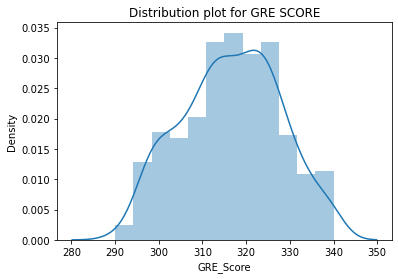

In [15]:
## Checking for skewness in data set using distribution plot (for continuous data)
x1=data_new.GRE_Score
sns.distplot(x1)
plt.title("Distribution plot for GRE SCORE")
plt.show()

## Negative skewness means the tail of the distribution is longer towards the left hand side of the curve
## The mean is less than the median, and they are both less than the mode
##(mode is most frequent value of the entire feature column)
## here The mean is less than the median, and they are both less than the mode
## since there is Skewness in GRE Score ,So we replace the missing values in GRE Score by median or mode value of GRE Score

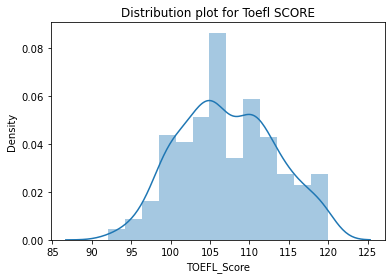

In [16]:
x2=data_new.TOEFL_Score
sns.distplot(x2)
plt.title("Distribution plot for Toefl SCORE")
plt.show()

## positive Skewness means the tail of the distribution is longer towards the right hand side of the curve
## the mean is the largest, while the mode is the smallest.
## here mean is greater than median and mode
## since there is Skewness in TOEFL Score so we replace the missing values in TOEFL Score by median value of TOEFL Score

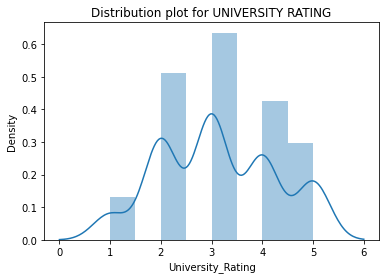

In [17]:
x3=data_new.University_Rating
sns.distplot(x3)
plt.title("Distribution plot for UNIVERSITY RATING")
plt.show()

## positive Skewness means the tail of the distribution is longer towards the right hand side of the curve
## the mean is the largest, while the mode is the smallest.
## here mean is greater than median and mode but median mode is equal
## since there is Skewness in University Rating so we replace the missing values in University Rating by median value of University Rating

## Filling missing values

In [18]:
data_new['GRE_Score']=data_new['GRE_Score'].fillna(value=data_new['GRE_Score'].median())
data_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [19]:
##Skweness and Kurtosis test i.e check for normality
## Skewness is used to measure the level of asymmetry in our graph.
## It is the measure of asymmetry that occurs when our data deviates from the norm
## Skewness is used to denote the horizontal pull on the data.
## -0.5 and 0.5, the distribution of the value is almost symmetrical
## -1 and -0.5, the data is negatively skewed,The skewness is moderate.(Mode > Median > Mean.)
##  0.5 to 1, the data is positively skewed. The skewness is moderate.(Mean > Median > Mode)
## If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed
## negative skewness means the tail of the distribution is longer towards the left hand side of the curve
## positive Skewness means the tail of the distribution is longer towards the right hand side of the curve

from scipy.stats import skew  
print("skewness for GRE Score is= ",skew(data_new.GRE_Score)) 

## Here distribution is almost symmetrical

skewness for GRE Score is=  -0.05589165030703576


In [20]:
# Kurtosis is used to find the presence of outliers in our data. It gives us the total degree of outliers present.
# Kurtosis is used to find the vertical pull or the peak's height. 
## A kurtosis greater than 3 will indicate Positive Kurtosis.
## For Positive Kurtosis, the values of kurtosis will range from 3 to infinity.
## A kurtosis less than 3 will mean a negative kurtosis.
## For Negative Kurtosis, the values kurtosis will range from  -2 to infinity.
#  The greater the value of kurtosis, the higher the peak. 

from scipy.stats import kurtosis
print("Kurtosis for GRE Score is= ",kurtosis(data_new.GRE_Score)) 

## data has Positive Kurtosis

Kurtosis for GRE Score is=  -0.6182871248967969


In [21]:
data_new['TOEFL_Score']=data_new['TOEFL_Score'].fillna(value=data_new['TOEFL_Score'].median())
data_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [22]:
from scipy.stats import skew
print("skewness for Toefl Score is= ",skew(data_new.TOEFL_Score))  

## Here distribution is almost symmetrical

skewness for Toefl Score is=  0.10464804146334956


In [23]:
from scipy.stats import kurtosis
print("Kurtosis for TOEFL Score is= ",kurtosis(data_new.TOEFL_Score))  

## data has Positive Kurtosis

Kurtosis for TOEFL Score is=  -0.6223050332786673


In [24]:
data_new['University_Rating']=data_new['University_Rating'].fillna(value=data_new['University_Rating'].median())
data_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [25]:
from scipy.stats import skew
print("skewness for Toefl Score is= ",skew(data_new.University_Rating))  

## Here distribution is almost symmetrical

skewness for Toefl Score is=  0.1017907639364531


In [26]:
from scipy.stats import kurtosis
print("Kurtosis for TOEFL Score is= ",kurtosis(data_new.University_Rating)) 

## data has Positive Kurtosis

Kurtosis for TOEFL Score is=  -0.771196123112678


In [27]:
data_new.isnull().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [28]:
## Skweness and Kurtosis test i.e check for normality
from scipy.stats import skew
for column in data_new:
    print('skew of ',column, skew(data_new[column]) )

skew of  GRE_Score -0.05589165030703576
skew of  TOEFL_Score 0.10464804146334956
skew of  University_Rating 0.1017907639364531
skew of  SOP -0.22828490586525177
skew of  LOR -0.14485407992929378
skew of  CGPA -0.02653261314181717
skew of  Research -0.24174688920761442
skew of  Chance_of_Admit -0.28909558547899383


In [29]:
from scipy import stats
for column in data_new:
    print('kurtosis of',column,stats.kurtosis(data_new[column]))

kurtosis of GRE_Score -0.6182871248967969
kurtosis of TOEFL_Score -0.6223050332786673
kurtosis of University_Rating -0.771196123112678
kurtosis of SOP -0.7106555639324257
kurtosis of LOR -0.7502879246086085
kurtosis of CGPA -0.5676573553864674
kurtosis of Research -1.9415584415584415
kurtosis of Chance_of_Admit -0.4621237427062441


<AxesSubplot:>

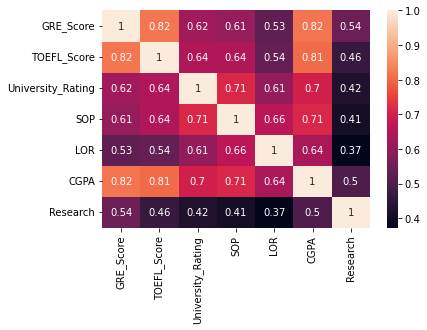

In [30]:
cor=data_new.corr()
sns.heatmap(data_new.drop('Chance_of_Admit',axis=1).corr(),annot=True)

## no features are highly correlated hence we dont remove any feature

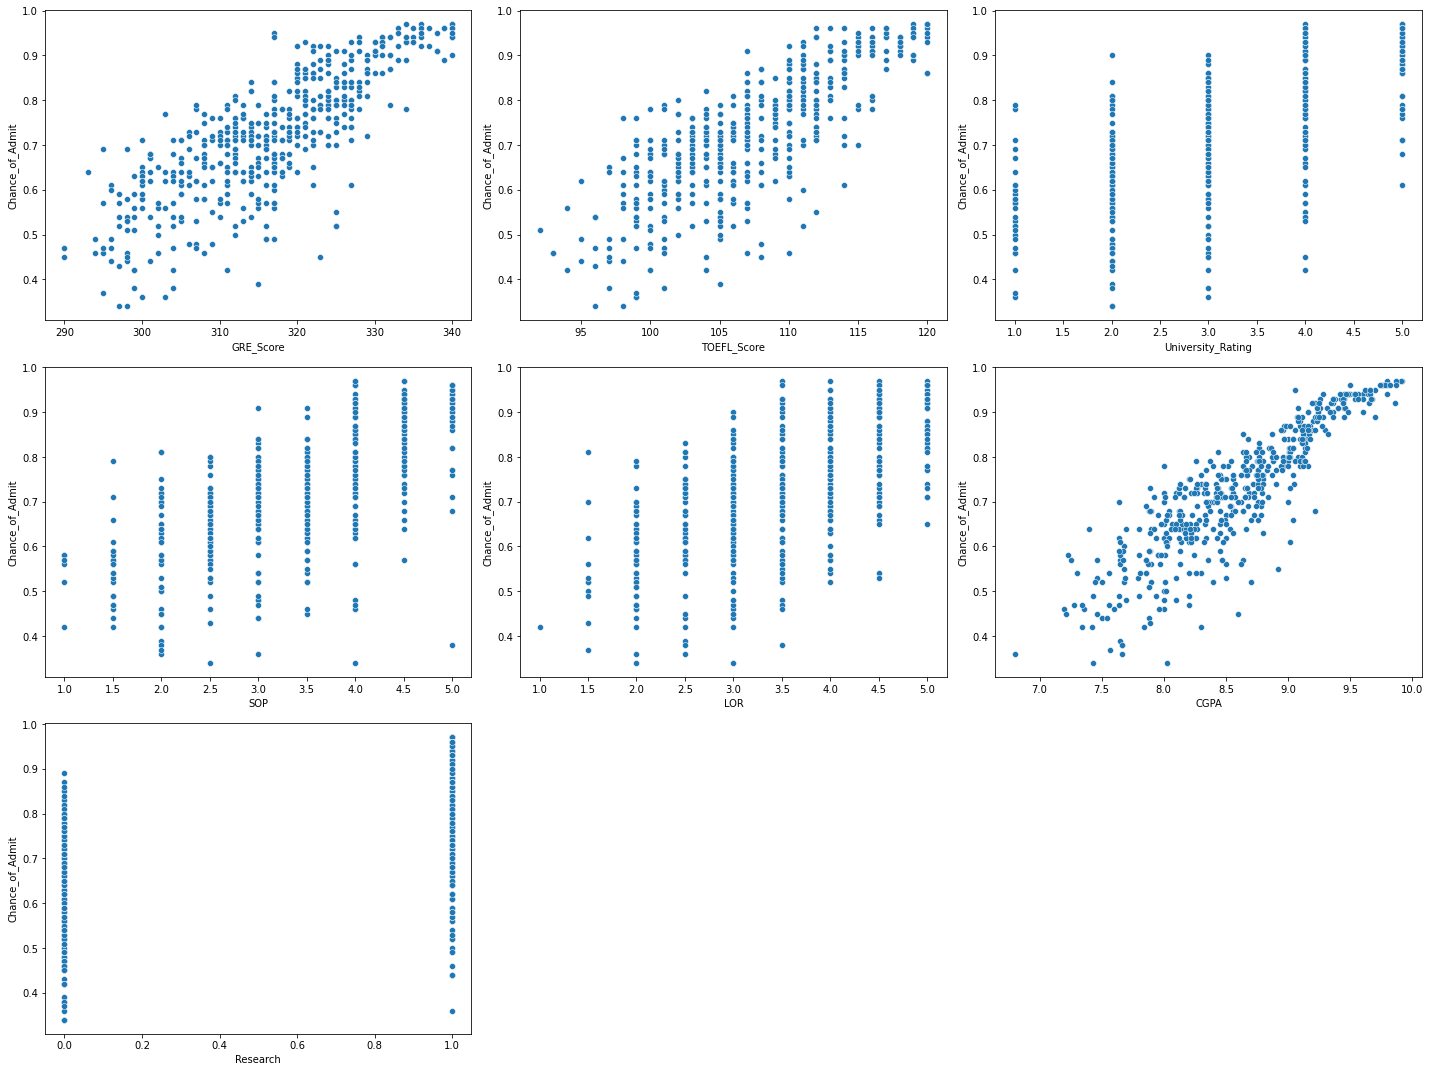

In [31]:
## to check linear relationship between input variables and target variables using scatter plot

plt.figure(figsize=(20,15), facecolor='white') #To set canvas 
plotnumber=1
for column in data_new:#accessing the columns 
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)#plotting 8 graph
        sns.scatterplot(x=data_new[column].dropna(axis=0),y=data_new.Chance_of_Admit) # scatter plot
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance_of_Admit',fontsize=10)
        plotnumber+=1#counter increment
#plt.show()
plt.tight_layout()

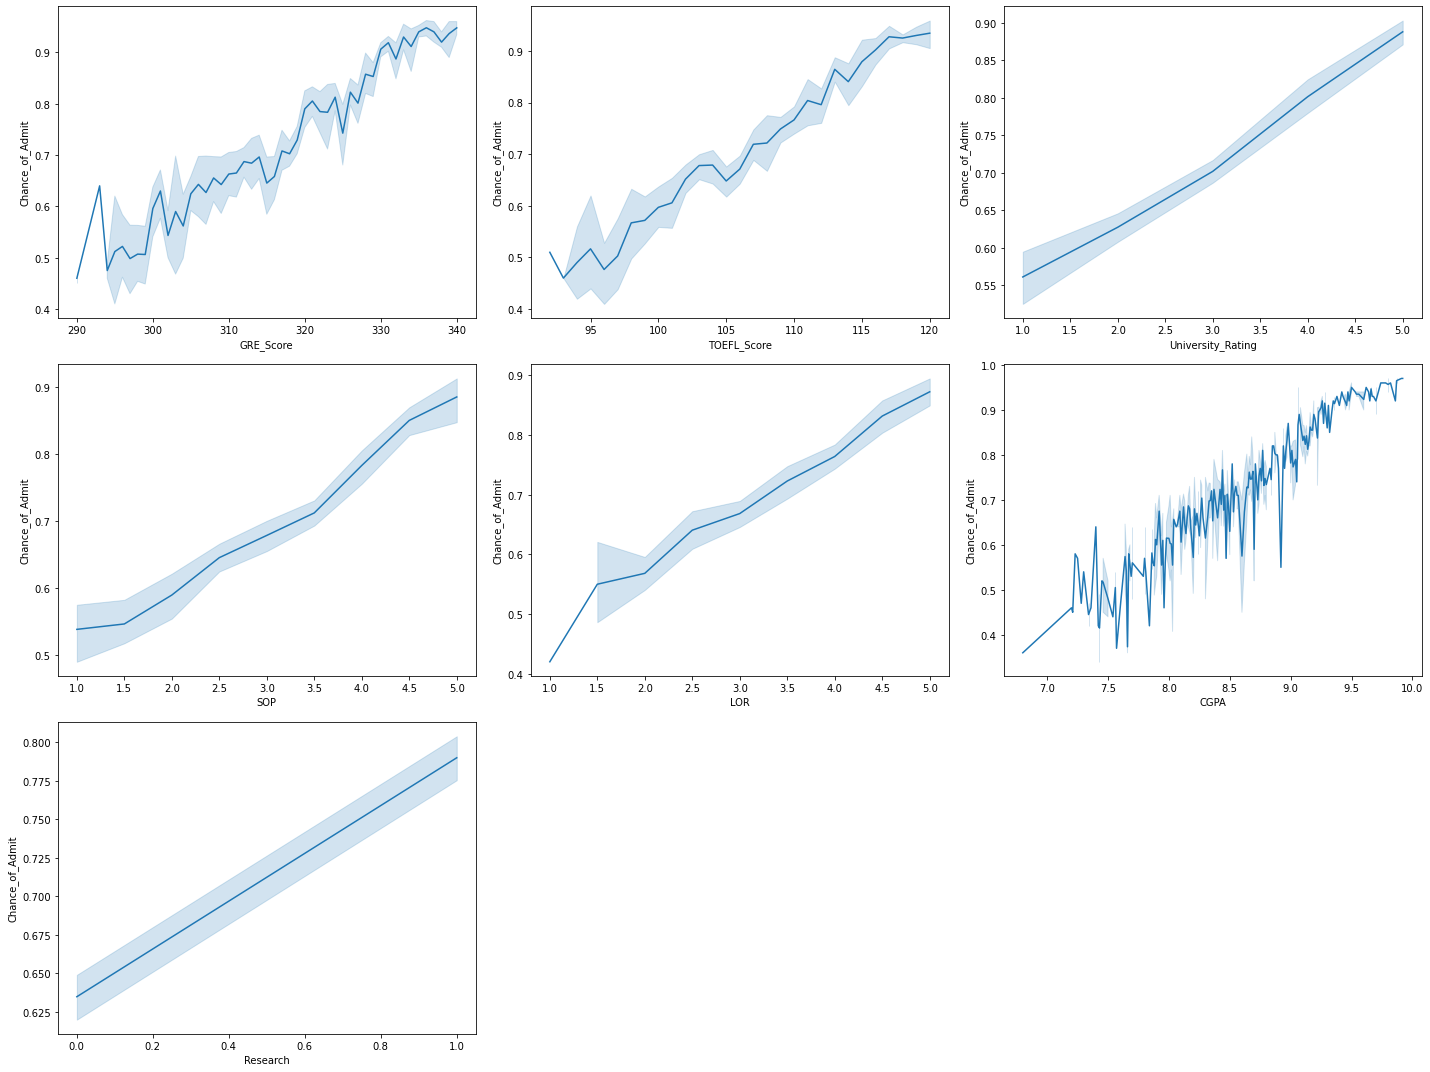

In [32]:
## to check linear relationship between input variables and target variables using line plot (for Continuous data)

plt.figure(figsize=(20,15), facecolor='white') #To set canvas 
plotnumber=1
for column in data_new:#accessing the columns 
    if plotnumber<=7:
        ax =plt.subplot(3,3,plotnumber)#plotting 8 graph
        sns.lineplot(x=data_new[column].dropna(axis=0),y=data_new.Chance_of_Admit) # scatter plot
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance_of_Admit',fontsize=10)
        plotnumber+=1#counter increment
#plt.show()
plt.tight_layout()

## All input variables has linear Relationship with the Target Variable('Chance_of_Admit')

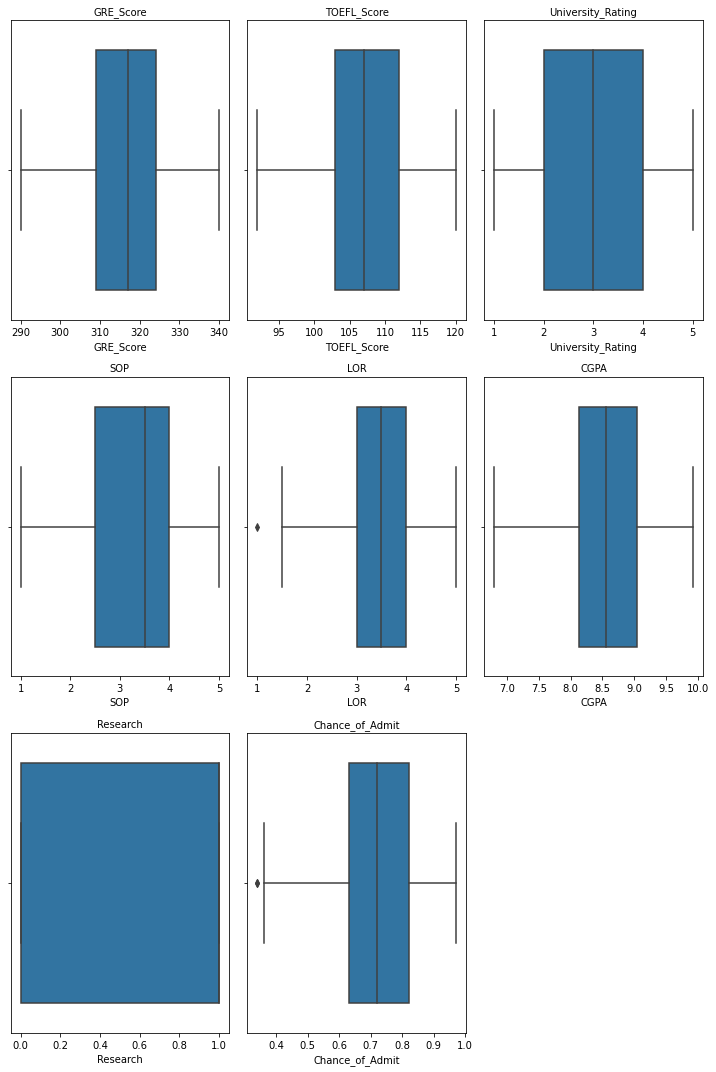

In [33]:
## Checking for outliers in data set using BOX plot (for continuous data)
plt.figure(figsize=(10,15), facecolor='white') #To set canvas 
plotnumber=1
for column in data_new:#accessing the columns 
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)#plotting 8 graph
        sns.boxplot(x=data_new[column]) # BOXplot
        plt.title(column,fontsize=10)
        plotnumber+=1#counter increment
#plt.show()
plt.tight_layout()

## LOR and Chance_of_Admi has outliers

In [58]:
## Standard Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data_new[['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']]= sc.fit_transform(data_new[['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']])
data_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.841505,1.789146,0.782010,1.137360,1.098944,1.776806,0.886405,0.92
1,0.669606,-0.030437,0.782010,0.632315,1.098944,0.485859,0.886405,0.76
2,0.038583,-0.526687,-0.104623,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489313,0.465813,-0.104623,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.231856,-0.692103,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152,0.65
...,...,...,...,...,...,...,...,...
495,1.390775,0.134980,1.668642,1.137360,0.558125,0.734118,0.886405,0.87
496,1.841505,1.623730,1.668642,1.642404,1.639763,2.140919,0.886405,0.96
497,1.210482,2.119980,1.668642,1.137360,1.639763,1.627851,0.886405,0.93
498,-0.412148,-0.692103,0.782010,0.632315,1.639763,-0.242367,-1.128152,0.73


In [35]:
X=data_new.iloc[:,:-1]
y=data_new.Chance_of_Admit

In [36]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.841505,1.789146,0.782010,1.137360,1.098944,1.776806,0.886405
1,0.669606,-0.030437,0.782010,0.632315,1.098944,0.485859,0.886405
2,0.038583,-0.526687,-0.104623,-0.377773,0.017306,-0.954043,0.886405
3,0.489313,0.465813,-0.104623,0.127271,-1.064332,0.154847,0.886405
4,-0.231856,-0.692103,-0.991255,-1.387862,-0.523513,-0.606480,-1.128152


In [37]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance_of_Admit, dtype: float64

In [38]:
# splitting training data and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [39]:
# model learning

from sklearn.linear_model import LinearRegression
LR=LinearRegression() ##creating the model
LR.fit(X_train,y_train) ## learning the model
y_train_predict=LR.predict(X_train) ## predicting the training output
y_test_predict=LR.predict(X_test) ## pedicting the test data output

In [40]:
y_train_predict

array([0.9344122 , 0.51238859, 0.67026759, 0.62148991, 0.86988023,
       0.69098795, 0.94899231, 0.64148296, 0.77221873, 0.86231528,
       0.82307149, 0.55838362, 0.97402461, 0.76888573, 0.71923618,
       0.72719995, 0.81487308, 0.71330304, 0.51341113, 0.76708319,
       0.74612579, 0.70743188, 0.71737061, 0.52620867, 0.67188711,
       0.50465186, 0.78249485, 0.64435346, 0.55881269, 0.67164422,
       0.69060524, 0.76561368, 0.72421532, 0.97371175, 0.93399686,
       0.67989304, 0.79143578, 0.86299011, 0.56633438, 0.5292982 ,
       0.82207248, 0.4297251 , 0.70172303, 0.63992572, 0.52617846,
       0.66161389, 0.63629685, 0.72294477, 0.65793431, 0.55794161,
       0.57755283, 0.73415045, 0.86719617, 0.48164134, 0.70749632,
       0.8360428 , 0.84243951, 0.85372179, 0.66017382, 0.76970349,
       0.65367877, 0.62197695, 0.71341165, 0.96304263, 0.94906509,
       0.61232874, 0.73639372, 0.62830202, 0.68884457, 0.61437482,
       0.7887572 , 0.91394058, 0.64882329, 0.94841851, 0.66161

In [41]:
y_test_predict

array([0.90959878, 0.90812552, 0.76608373, 0.85056491, 0.71814601,
       0.75254037, 0.65230404, 0.84314964, 0.62048905, 0.75280333,
       0.91566992, 0.85209723, 0.83832622, 0.67425196, 0.77958415,
       0.74017255, 0.84225165, 0.93893062, 0.78021713, 0.61748976,
       0.72499926, 0.59765325, 0.61968712, 0.85683421, 0.51623542,
       0.92431021, 0.7232457 , 0.51145883, 0.69626255, 0.7283487 ,
       0.94985753, 0.78446172, 0.56773448, 0.68370523, 0.73035479,
       0.88038262, 0.79059769, 0.67241372, 0.66656267, 0.73472133,
       0.89948491, 0.62407849, 0.69558592, 0.91148904, 0.96002539,
       0.54825444, 0.6142925 , 0.78218318, 0.78600127, 0.70265673,
       0.77387992, 0.72170869, 0.5805473 , 0.59484177, 0.71114413,
       0.77390962, 0.85700426, 0.59615134, 0.77703639, 0.92014123,
       0.66046514, 0.89906861, 0.73141546, 0.53186214, 0.81421993,
       0.53899965, 0.72017869, 0.69424509, 0.52292115, 0.77947148,
       0.91363744, 0.56147734, 0.6062079 , 0.74830265, 0.70414

## Evaluation of metrics

In [42]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [43]:
##  for test data

R2_score_test=r2_score(y_test,y_test_predict)
print('r2 score for test data =',R2_score_test)

r2 score for test data = 0.8055641063644788


In [44]:
mse_test=mean_squared_error(y_test,y_test_predict)
print('MSE for test data =',mse_test)

MSE for test data = 0.003325345487938428


In [45]:
import numpy as np
rmse_test=np.sqrt(mse_test)
print('RMSE for test data =',rmse_test)

RMSE for test data = 0.057665808655896156


In [46]:
mae_test=mean_absolute_error(y_test,y_test_predict)
print('MAE for test data =',mae_test)

MAE for test data = 0.039443347223094005


In [47]:
X_test.shape ## gives no of records for test data

(150, 7)

In [48]:
## Adjusted R2 Score

adjusted_r2_test=1-(1-0.8055641063644788)*(150-1)/(150-7-1)  ## adjusted_r2_score=[1-(1-r2_score)(N-1)]/(N-P-1)
print('Adjusted r2 score for test data = ',adjusted_r2_test)  ## N=total no of records, P= No of input columns

Adjusted r2 score for test data =  0.7959792383683616


####  since r2 score of test data is  80.55%, model performance is very good for testing data
####  since there is very less difference in R2 score and Adjusted R2 score in test data so there is no unimportant features

In [49]:
##  for training data
R2_score_train=r2_score(y_train,y_train_predict)
print('r2 score for train data =',R2_score_train)

r2 score for train data = 0.8243598226688447


In [50]:
mse_train=mean_squared_error(y_train,y_train_predict)
print('MSE for train data =',mse_train)

MSE for train data = 0.003687996952695026


In [51]:
rmse_train=np.sqrt(mse_train)
print('RMSE for train data =',rmse_train)

RMSE for train data = 0.06072888071333956


In [52]:
mae_train=mean_absolute_error(y_train,y_train_predict)
print('MAE for train data =',mae_train)

MAE for train data = 0.04429113218109908


In [53]:
X_train.shape ## gives no of records for training data

(350, 7)

In [54]:
## Adjusted R2 Score

adjusted_r2_train=1-(1-0.8243598226688447)*(350-1)/(350-7-1)  ## adjusted_r2_score=[1-(1-r2_score)(N-1)]/(N-P-1)
print('Adjusted r2 score for training data = ',adjusted_r2_train)  ## N=total no of records, P= No of input columns

Adjusted r2 score for training data =  0.8207648482790257


####  since r2 score for training data is 82.43% so model performance is very good for training data
####  since there is very less difference in R2 score and Adjusted R2 score in training data so there is no unimportant features

In [55]:
print('intercept:', LR.intercept_) ## c value

intercept: 0.7227735996343526


In [56]:
print('slope:', LR.coef_) ## m values

slope: [0.0222368  0.01186085 0.00388095 0.00604104 0.01394186 0.07581003
 0.01248535]


##  Insights of the data set

In [57]:
## Since model perform well with the training as well as testing data, So our model is Generalize MODEL
## There is low Bias and low Variance